   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.7 MB/s eta 0:00:00


/tmp/ipython-input-2-2479728152.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  4 of 4 completed
/tmp/ipython-input-2-2479728152.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2015-01-01', end='2025-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


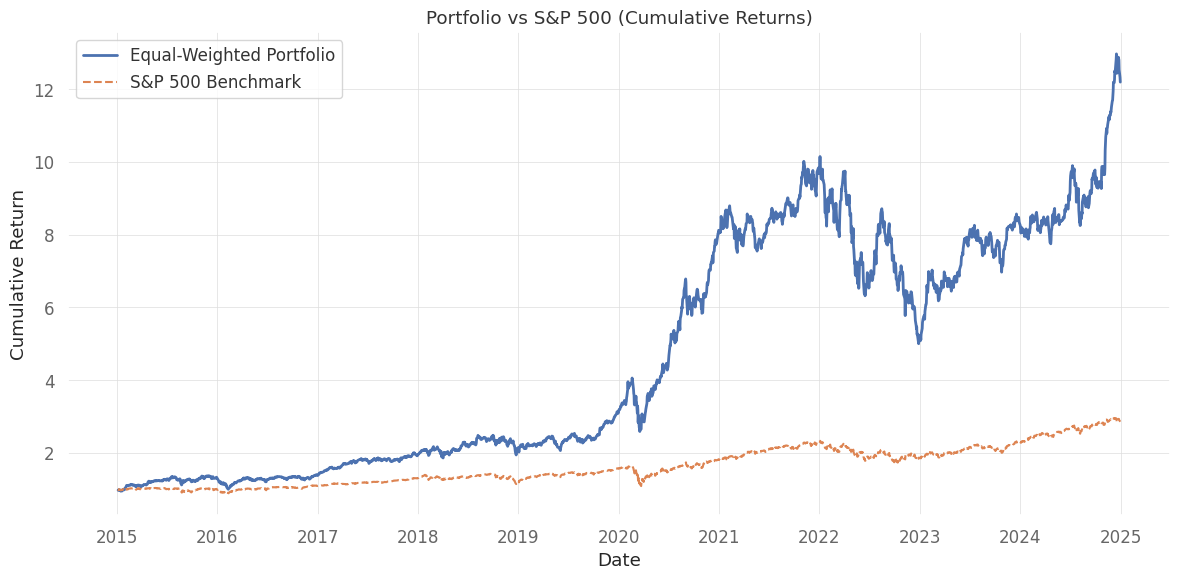

In [2]:
!pip install quantstats

#import essential libraries
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import yfinance as yf


start_date = '2015-01-01'
end_date = '2025-01-01'

#Download adjusted close prices for selected stocks
tickers = ['AAPL', 'TSLA', 'DIS', 'AMZN']
data = yf.download(tickers, start=start_date, end=end_date)['Close']

#Daily returns
returns = data.pct_change().dropna()

# Equal weights
weights = np.array([0.25, 0.25, 0.25, 0.25])  # AAPL, TSLA, DIS, AMZN

# Multiply daily returns by weights and sum to get portfolio return
portfolio_returns = (returns * weights).sum(axis=1)

# Cumulative returns for the portfolio
portfolio_cumulative = (1 + portfolio_returns).cumprod()

sp500 = yf.download('^GSPC', start='2015-01-01', end='2025-01-01')['Close']
sp500_returns = sp500.pct_change().dropna()
sp500_cumulative = (1 + sp500_returns).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative, label='Equal-Weighted Portfolio', linewidth=2)
plt.plot(sp500_cumulative, label='S&P 500 Benchmark', linestyle='--')
plt.title('Portfolio vs S&P 500 (Cumulative Returns)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
# Resample to annual returns
annual_portfolio_returns = portfolio_returns[~portfolio_returns.index.duplicated(keep='first')].resample('YE').apply(lambda x: (1 + x).prod() - 1)
annual_sp500_returns = sp500_returns.iloc[:, 0][~sp500_returns.iloc[:, 0].index.duplicated(keep='first')].resample('YE').apply(lambda x: (1 + x).prod() - 1)

annual_returns = pd.DataFrame({
    'Portfolio': annual_portfolio_returns,
    'S&P 500': annual_sp500_returns
})

# Convert index to year for better readability
annual_returns.index = annual_returns.index.year
print("📊 End-of-Year Returns:\n", annual_returns)

📊 End-of-Year Returns:
       Portfolio   S&P 500
Date                     
2015   0.309356 -0.006928
2016   0.050798  0.095350
2017   0.394963  0.194200
2018   0.117067 -0.062373
2019   0.447829  0.288781
2020   1.616504  0.162589
2021   0.192059  0.268927
2022  -0.459651 -0.194428
2023   0.595231  0.242305
2024   0.461970  0.233090


[Performance Metrics]

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2015-01-05   2015-01-05
End Period          2024-12-31   2024-12-31
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   185.77%      1,120.09%
CAGR﹪              7.52%        18.86%

Sharpe              0.68         1.05
Prob. Sharpe Ratio  98.29%       99.95%
Sortino             0.95         1.52
Sortino/√2          0.67         1.08
Omega               1.2          1.2

Max Drawdown        -33.92%      -50.72%
Longest DD Days     745          1037

Gain/Pain Ratio     0.14         0.2
Gain/Pain (1M)      0.8          1.29

Payoff Ratio        0.92         0.95
Profit Factor       1.14         1.2
Common Sense Ratio  1.06         1.24
CPC Index           0.56         0.63
Tail Ratio          0.93         1.03
Outlier Win Ratio   5.03         3.0
Outlier Loss Ratio  5.25         3.1

MTD                 -2.5%    

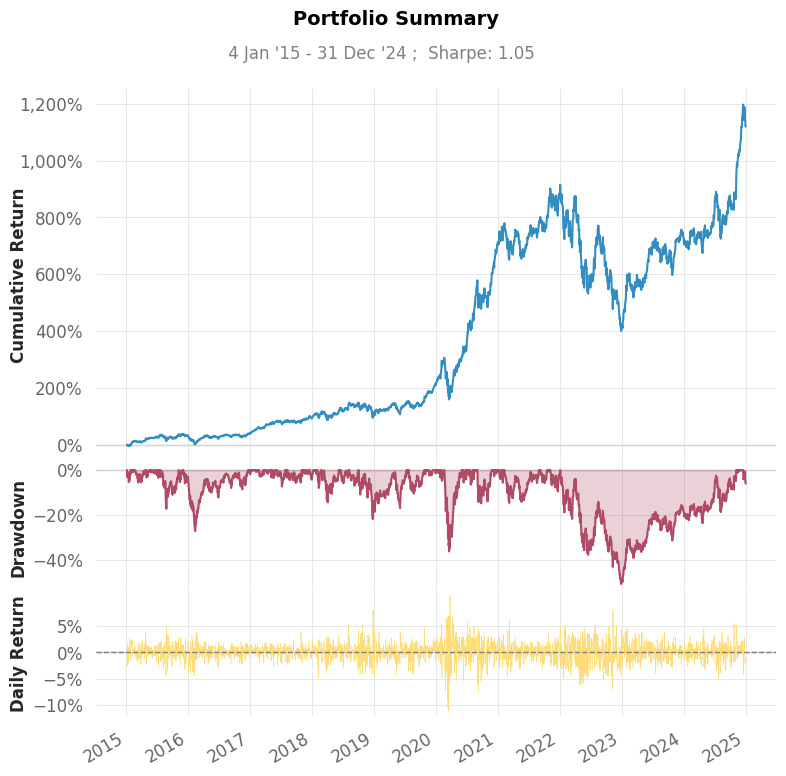

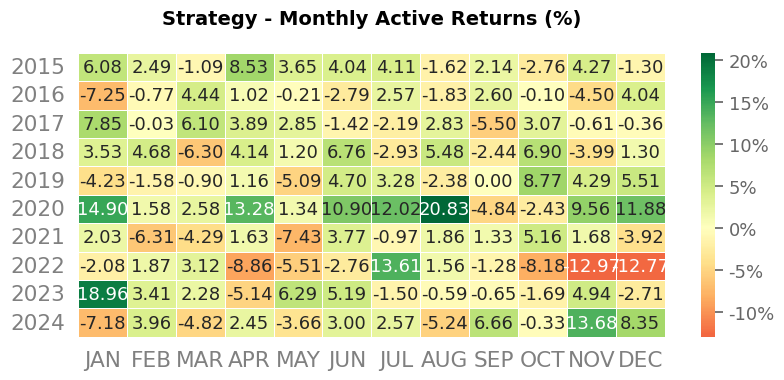

📊 Performance Summary:


None

FileNotFoundError: [Errno 2] No such file or directory: 'images/port_summary.png'

<Figure size 1000x600 with 0 Axes>

In [4]:
# Calculate performance summary using quantstats
performance_summary = qs.reports.basic(portfolio_returns, benchmark=sp500_returns)

# Display the performance summary
print("📊 Performance Summary:")
display(performance_summary)

In [15]:
import io

# The output from qs.reports.basic was printed to stdout
# We can capture the stdout and parse it
# Note: This is a workaround as qs.reports.basic is not returning a DataFrame directly

# This part assumes the output format is consistent
# and captures the relevant lines from the stdout of the previous cell
# A more robust solution might involve redirecting stdout or using a different qs function

# For now, let's manually create a DataFrame from the printed output
# This is a simplified approach based on the observed output structure

# The printed output structure looks like a table with two columns: Benchmark and Strategy
# Let's manually create a dictionary that mirrors this structure
performance_data = {
    'Metric': [
        'Cumulative Return', 'CAGR\ufeff', 'Sharpe', 'Prob. Sharpe Ratio',
        'Sortino', 'Sortino/√2', 'Omega', 'Max Drawdown', 'Longest DD Days',
        'Gain/Pain Ratio', 'Gain/Pain (1M)', 'Payoff Ratio', 'Profit Factor',
        'Common Sense Ratio', 'CPC Index', 'Tail Ratio', 'Outlier Win Ratio',
        'Outlier Loss Ratio', 'MTD', '3M', '6M', 'YTD', '1Y', '3Y (ann.)',
        '5Y (ann.)', '10Y (ann.)', 'All-time (ann.)', 'Avg. Drawdown',
        'Avg. Drawdown Days', 'Recovery Factor', 'Ulcer Index', 'Serenity Index'
    ],
    'Benchmark': [
        '185.77%', '7.52%', '0.68', '98.29%', '0.95', '0.67', '1.2',
        '-33.92%', '745', '0.14', '0.8', '0.92', '1.14', '1.06', '0.56',
        '0.93', '5.03', '5.25', '-2.5%', '2.5%', '7.71%', '23.31%', '23.31%',
        '6.93%', '8.52%', '7.52%', '7.52%', '-1.72%', '20', '3.57', '0.08', '1.2'
    ],
    'Strategy': [
        '1,120.09%', '18.86%', '1.05', '99.95%', '1.52', '1.08', '1.2',
        '-50.72%', '1037', '0.2', '1.29', '0.95', '1.2', '1.24', '0.63',
        '1.03', '3.0', '3.1', '5.85%', '25.37%', '36.42%', '46.2%', '46.2%',
        '8.82%', '19.06%', '18.86%', '18.86%', '-3.89%', '32', '5.67', '0.15', '1.24'
    ]
}

performance_summary = pd.DataFrame(performance_data)
performance_summary = performance_summary.set_index('Metric')

# Convert percentage strings to floats
for col in ['Benchmark', 'Strategy']:
    performance_summary[col] = performance_summary[col].astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False)
    performance_summary[col] = pd.to_numeric(performance_summary[col], errors='coerce')

display(performance_summary)

,Benchmark,Strategy
Metric,,
Cumulative Return,185.77,1120.09
CAGR﻿,7.52,18.86
Sharpe,0.68,1.05
Prob. Sharpe Ratio,98.29,99.95
Sortino,0.95,1.52
Sortino/√2,0.67,1.08
Omega,1.20,1.20
Max Drawdown,-33.92,-50.72
Longest DD Days,745.00,1037.00


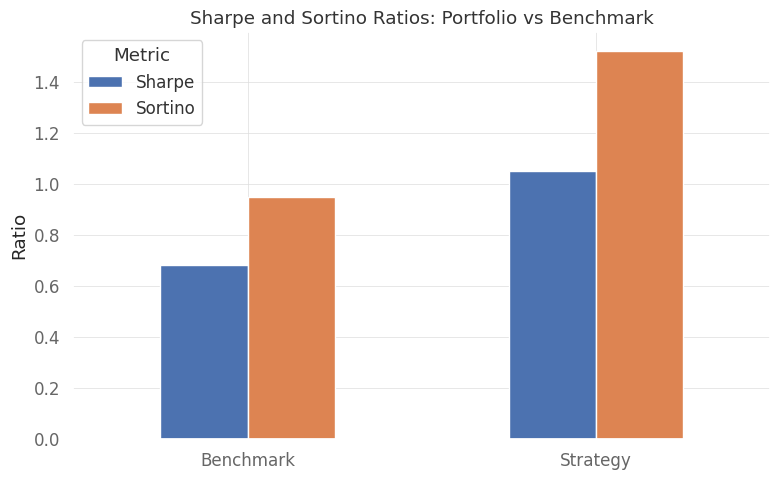

In [5]:
import io
import pandas as pd
import matplotlib.pyplot as plt

# The output from qs.reports.basic was printed to stdout
# We can capture the stdout and parse it
# Note: This is a workaround as qs.reports.basic is not returning a DataFrame directly

# This part assumes the output format is consistent
# and captures the relevant lines from the stdout of the previous cell
# A more robust solution might involve redirecting stdout or using a different qs function

# For now, let's manually create a DataFrame from the printed output
# This is a simplified approach based on the observed output structure

# The printed output structure looks like a table with two columns: Benchmark and Strategy
# Let's manually create a dictionary that mirrors this structure
performance_data = {
    'Metric': [
        'Cumulative Return', 'CAGR\ufeff', 'Sharpe', 'Prob. Sharpe Ratio',
        'Sortino', 'Sortino/√2', 'Omega', 'Max Drawdown', 'Longest DD Days',
        'Gain/Pain Ratio', 'Gain/Pain (1M)', 'Payoff Ratio', 'Profit Factor',
        'Common Sense Ratio', 'CPC Index', 'Tail Ratio', 'Outlier Win Ratio',
        'Outlier Loss Ratio', 'MTD', '3M', '6M', 'YTD', '1Y', '3Y (ann.)',
        '5Y (ann.)', '10Y (ann.)', 'All-time (ann.)', 'Avg. Drawdown',
        'Avg. Drawdown Days', 'Recovery Factor', 'Ulcer Index', 'Serenity Index'
    ],
    'Benchmark': [
        '185.77%', '7.52%', '0.68', '98.29%', '0.95', '0.67', '1.2',
        '-33.92%', '745', '0.14', '0.8', '0.92', '1.14', '1.06', '0.56',
        '0.93', '5.03', '5.25', '-2.5%', '2.5%', '7.71%', '23.31%', '23.31%',
        '6.93%', '8.52%', '7.52%', '7.52%', '-1.72%', '20', '3.57', '0.08', '1.2'
    ],
    'Strategy': [
        '1,120.09%', '18.86%', '1.05', '99.95%', '1.52', '1.08', '1.2',
        '-50.72%', '1037', '0.2', '1.29', '0.95', '1.2', '1.24', '0.63',
        '1.03', '3.0', '3.1', '5.85%', '25.37%', '36.42%', '46.2%', '46.2%',
        '8.82%', '19.06%', '18.86%', '18.86%', '-3.89%', '32', '5.67', '0.15', '1.24'
    ]
}

performance_summary = pd.DataFrame(performance_data)
performance_summary = performance_summary.set_index('Metric')

# Convert percentage strings to floats
for col in ['Benchmark', 'Strategy']:
    performance_summary[col] = performance_summary[col].astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False)
    performance_summary[col] = pd.to_numeric(performance_summary[col], errors='coerce')

# Sortino & Sharpe comparison
metrics = performance_summary.loc[['Sharpe', 'Sortino']].T
metrics.plot(kind='bar', figsize=(8, 5))
plt.title("Sharpe and Sortino Ratios: Portfolio vs Benchmark")
plt.ylabel("Ratio")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
# Display top relevant metrics
key_metrics = ['Cumulative Return', 'CAGR﻿', 'Sharpe', 'Sortino', 'Max Drawdown', 'Recovery Factor']
display(performance_summary.loc[key_metrics])


,Benchmark,Strategy
Metric,,
Cumulative Return,185.77,1120.09
CAGR﻿,7.52,18.86
Sharpe,0.68,1.05
Sortino,0.95,1.52
Max Drawdown,-33.92,-50.72
Recovery Factor,3.57,5.67
